In [134]:
import warnings
warnings.filterwarnings("ignore")

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [136]:
spf = pd.read_csv("./kaggle/StudentPerformanceFactors.csv")

In [137]:
#checking duplicates
spf.duplicated().sum()

np.int64(0)

In [138]:
spf.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [139]:
spf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [140]:
print(f'Shape : {spf.shape}')

Shape : (6607, 20)


<Axes: xlabel='Gender', ylabel='count'>

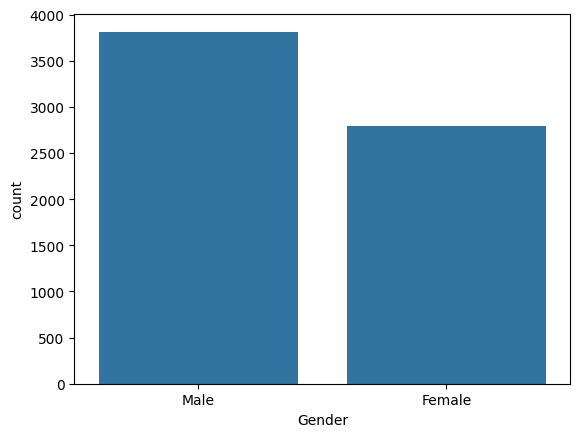

In [141]:
sns.countplot(x= 'Gender', data=spf)

<Axes: xlabel='Gender', ylabel='Exam_Score'>

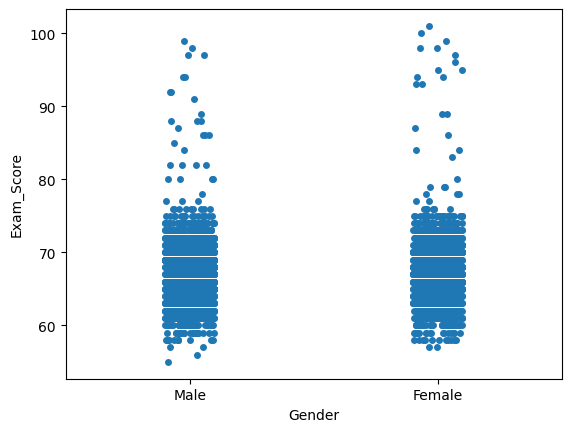

In [142]:
sns.stripplot(x= 'Gender', y='Exam_Score', data=spf)

In [143]:
print(f'Missing Values : \n\n {spf.isna().sum()}')

Missing Values : 

 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [144]:
spf.isna().mean()*100

,0
Hours_Studied,0.000000
Attendance,0.000000
Parental_Involvement,0.000000
Access_to_Resources,0.000000
Extracurricular_Activities,0.000000
Sleep_Hours,0.000000
Previous_Scores,0.000000
Motivation_Level,0.000000
Internet_Access,0.000000
Tutoring_Sessions,0.000000


In [145]:
#missing data is very less so we will discard it
spf.dropna(inplace=True)

In [146]:
print(f'Missing Values : \n\n {spf.isna().sum()}')

Missing Values : 

 Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [147]:
spf.shape

(6378, 20)

In [148]:
spf.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [149]:
cat_cols = spf.select_dtypes(include='object').columns
num_cols = spf.select_dtypes(include='int64').columns

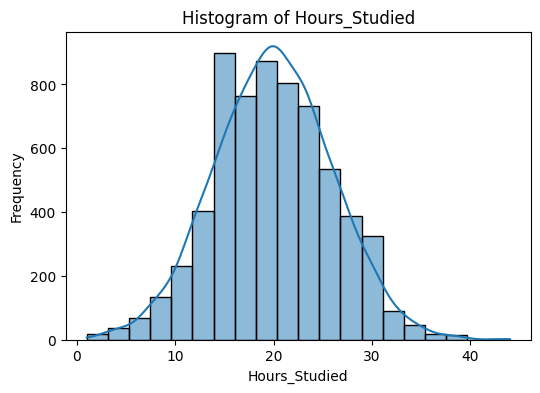

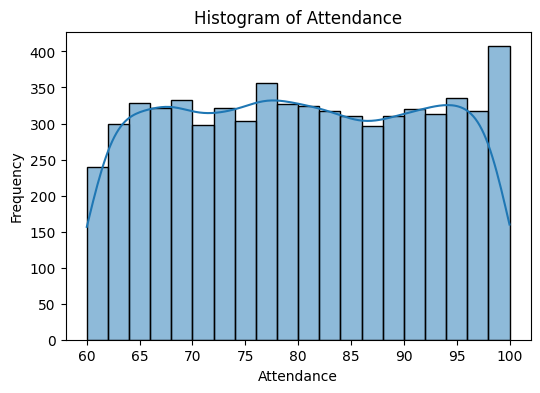

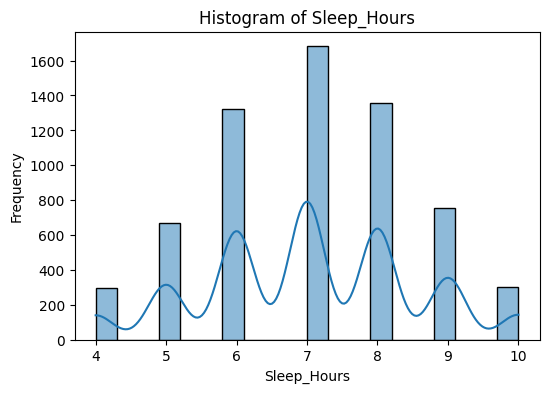

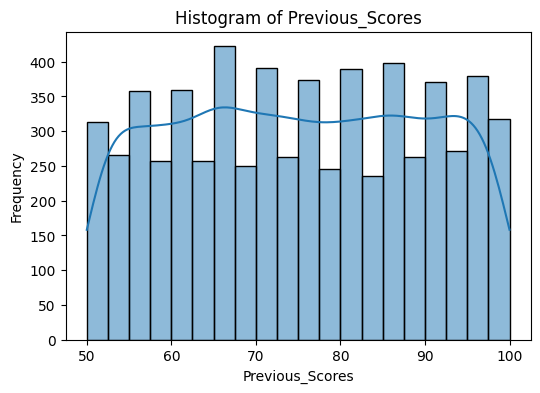

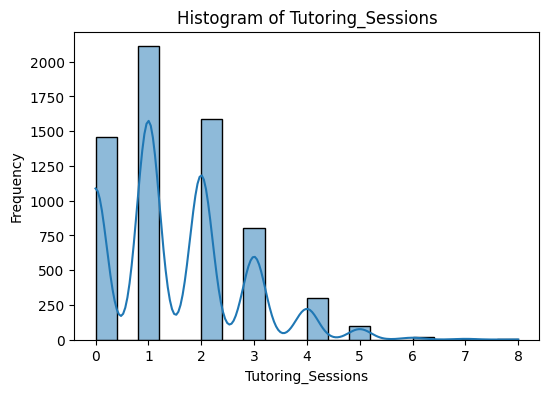

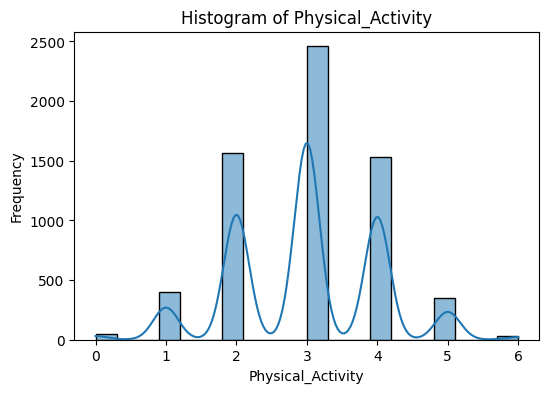

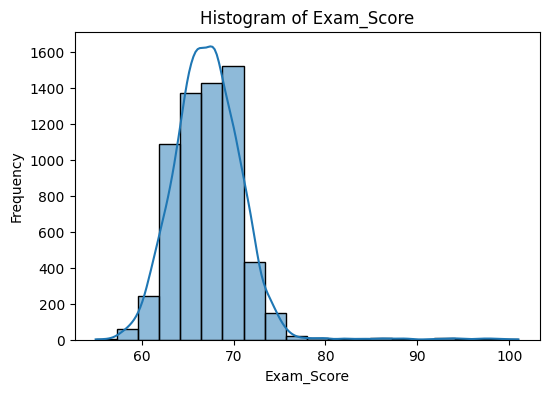

In [150]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(spf[col],bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

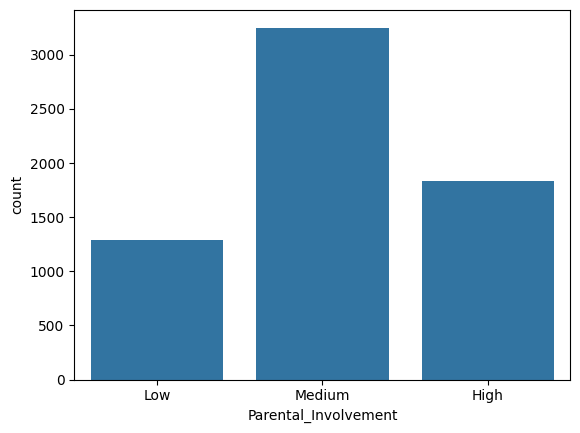

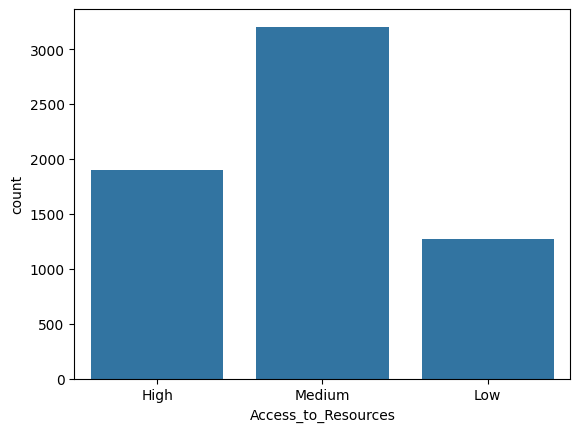

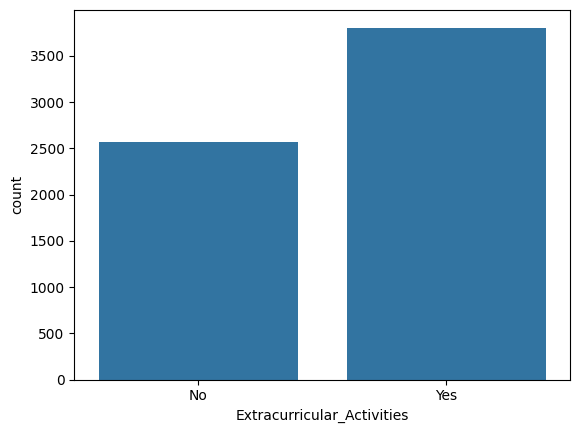

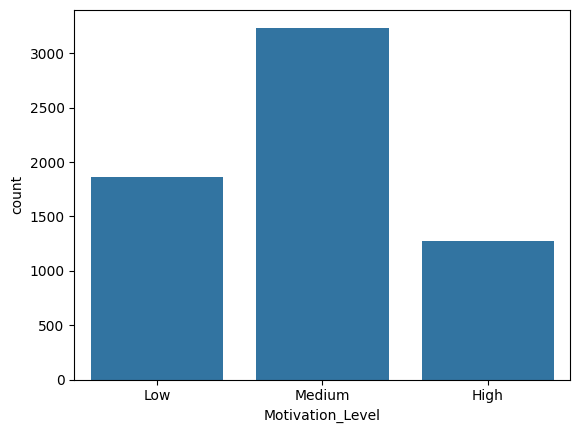

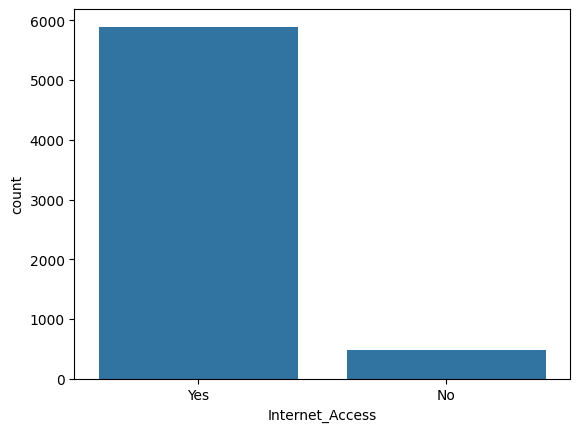

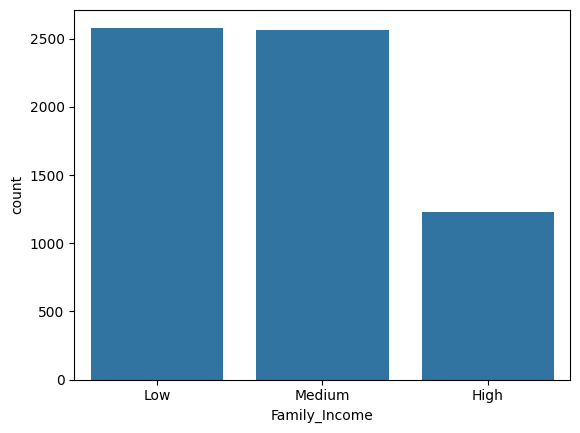

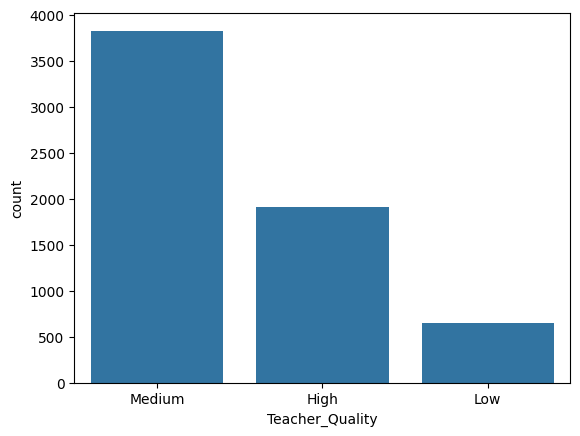

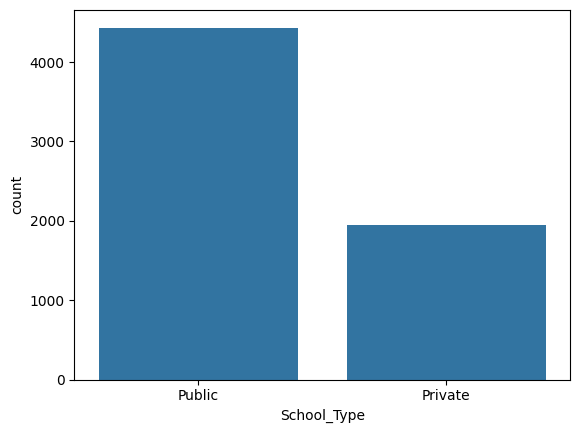

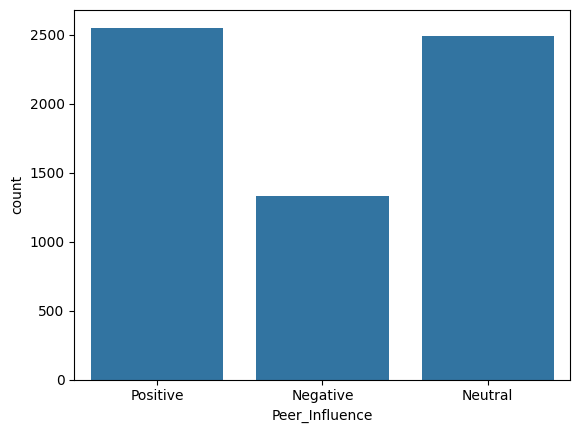

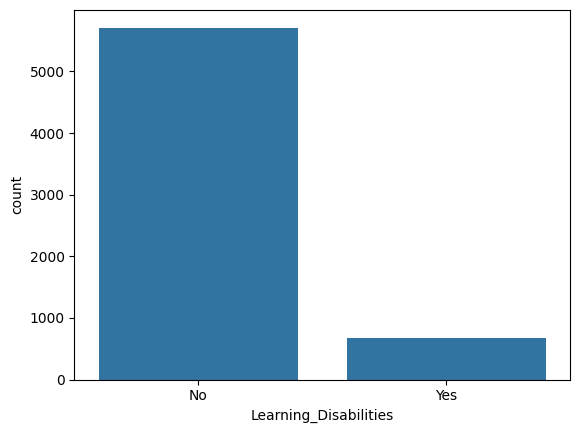

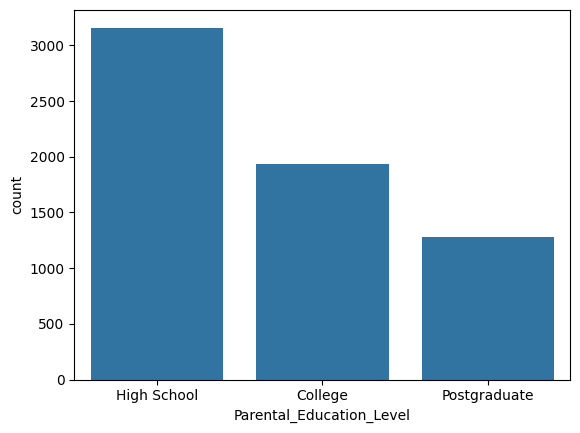

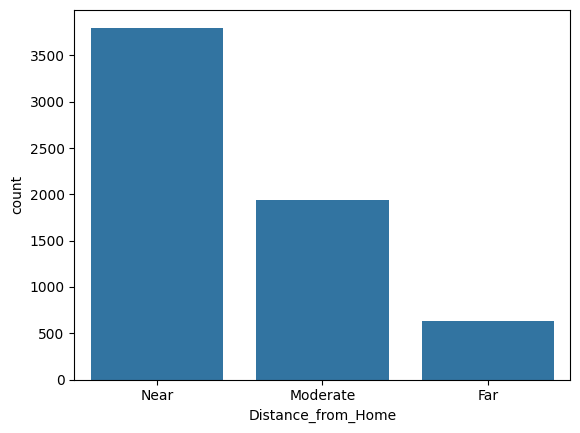

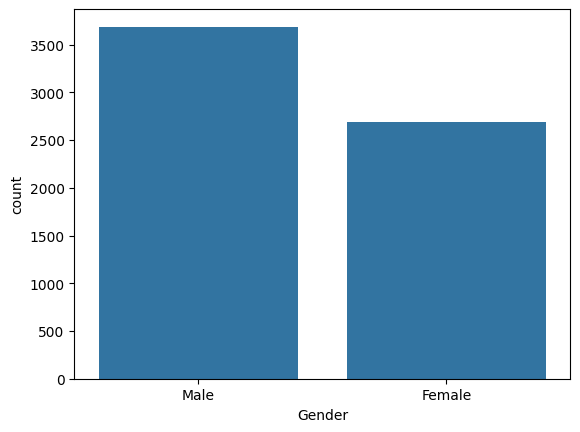

In [151]:
for col in cat_cols:
    sns.countplot(x=col, data=spf)
    plt.show()

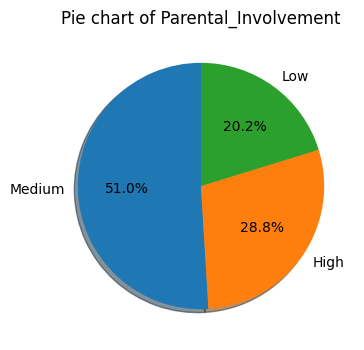

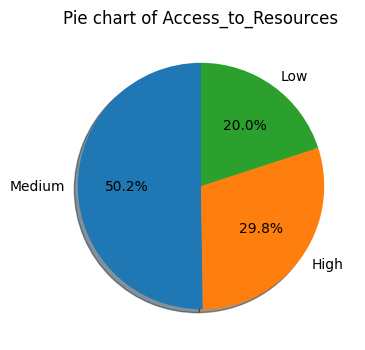

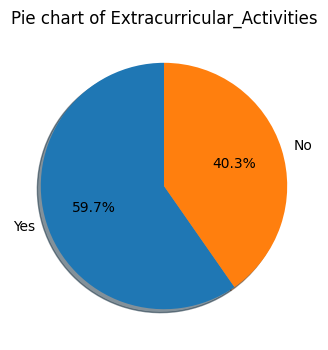

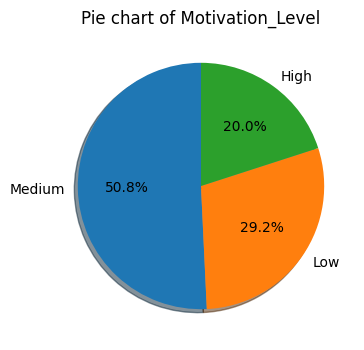

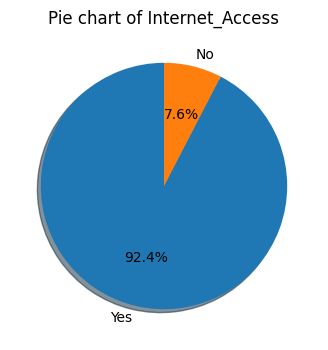

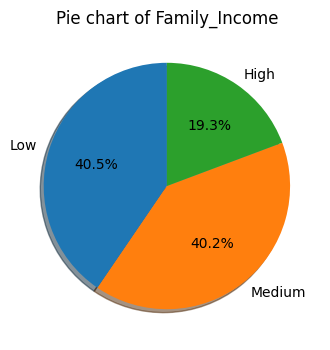

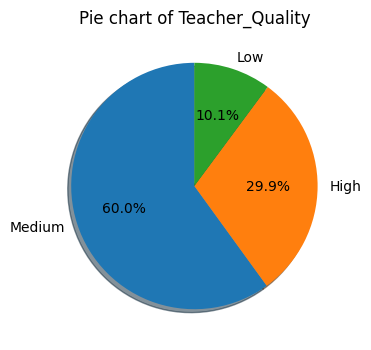

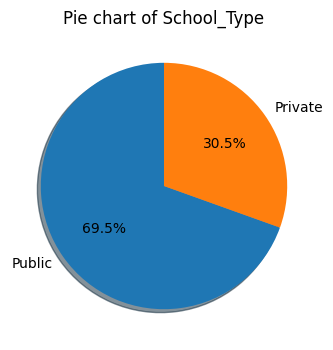

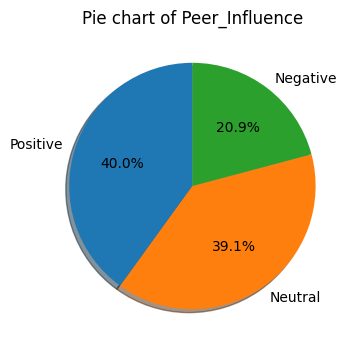

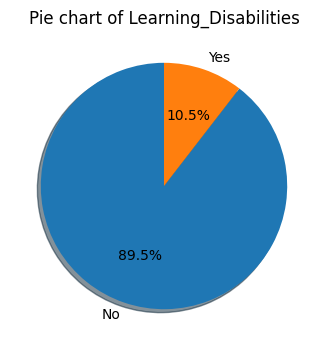

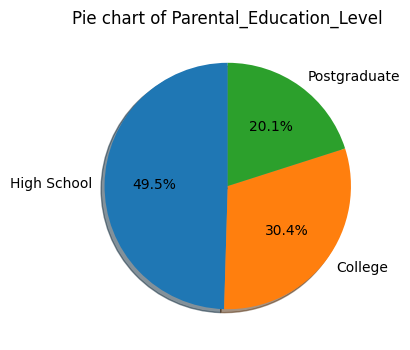

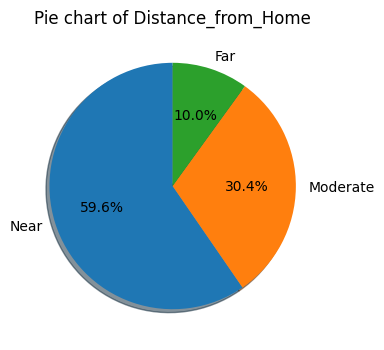

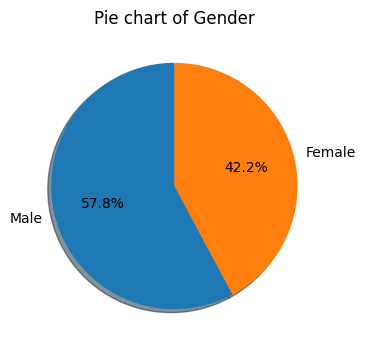

In [152]:
for col in cat_cols:
    plt.figure(figsize=(4,4))
    spf[col].value_counts().plot(kind='pie', autopct='%1.1f%%',startangle=90, shadow=True)
    plt.title(f'Pie chart of {col}')
    plt.ylabel('')
    plt.show()

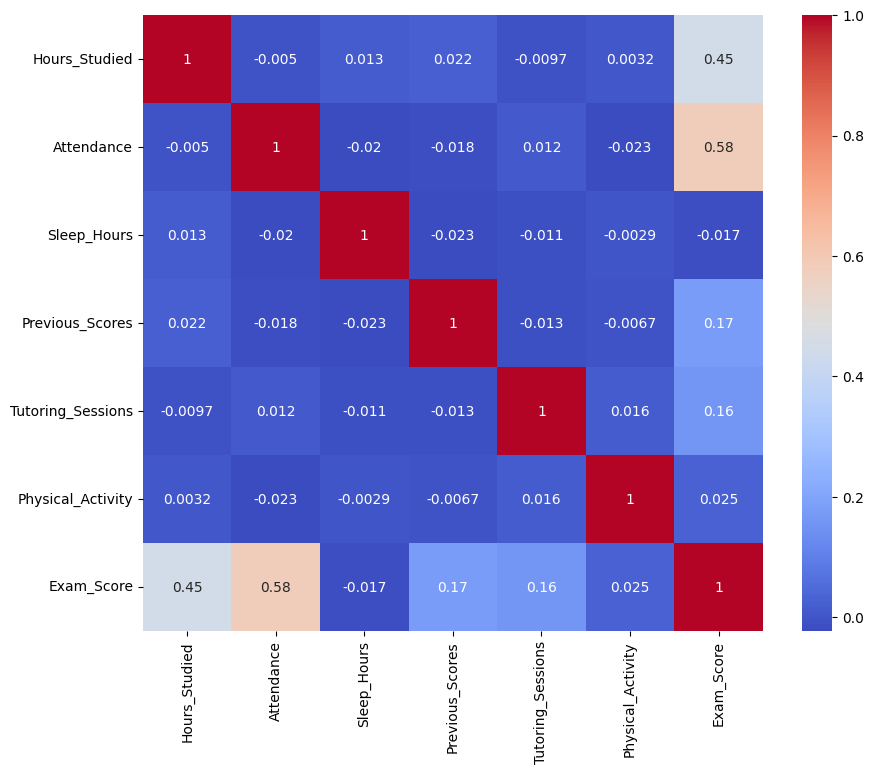

In [153]:
plt.figure(figsize=(10,8))
sns.heatmap(spf[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

In [154]:
encoded_spf = spf.copy()
encoded_cat_cols=cat_cols.copy()
encoded_num_cols=num_cols.copy()

In [155]:
for col in encoded_cat_cols:
    le = LabelEncoder()
    encoded_spf[col] = le.fit_transform(encoded_spf[col])

In [156]:
encoded_spf.shape

(6378, 20)

In [157]:
encoded_spf.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [158]:
spf.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [159]:
print(f"Lowest Score: {spf['Exam_Score'].min()}")
print(f"Highest Score: {spf['Exam_Score'].max()}")
print(f"Mean Score: {spf['Exam_Score'].mean()}")
print(f"Median Score: {spf['Exam_Score'].median()}")

Lowest Score: 55
Highest Score: 101
Mean Score: 67.25211665098777
Median Score: 67.0


In [160]:
Q1 = encoded_spf['Exam_Score'].quantile(0.20)
Q3 = encoded_spf['Exam_Score'].quantile(0.90)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower bound:", lower)
print("Upper bound:", upper)

Q1: 64.0
Q3: 72.0
IQR: 8.0
Lower bound: 52.0
Upper bound: 84.0


In [161]:
print("Shape Before Removing Outliers:", encoded_spf.shape)

Shape Before Removing Outliers: (6378, 20)


In [162]:
encoded_spf_cleaned = encoded_spf[(encoded_spf['Exam_Score'] >= lower) & (encoded_spf['Exam_Score'] <= upper)]

In [163]:
print("Shape After Removing Outliers:", encoded_spf_cleaned.shape)

Shape After Removing Outliers: (6343, 20)


In [164]:
X = encoded_spf_cleaned.drop('Exam_Score', axis=1)
y = encoded_spf_cleaned['Exam_Score']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
y.head()

,Exam_Score
0,67
1,61
2,74
3,71
4,70


In [167]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [173]:
y_pred = model.predict(X_test)

In [187]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae} %")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.394058304160852
Root Mean Squared Error: 1.180702462164305
Mean Absolute Error: 0.013349237926642173 %
R^2 Score: 0.8688180682521149


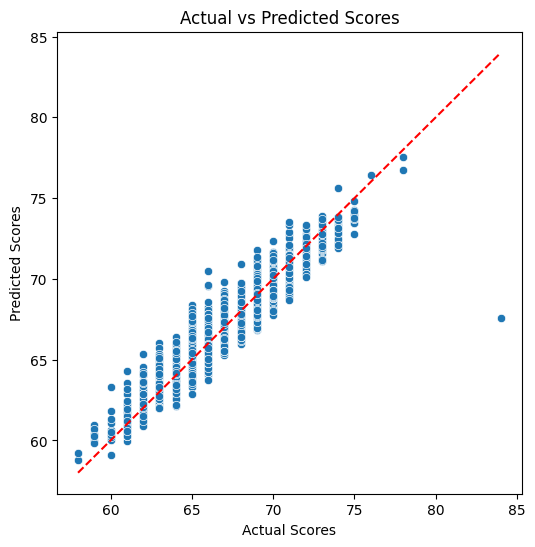

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.show()

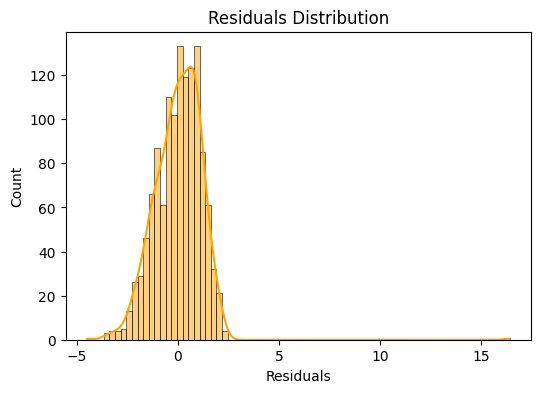

In [189]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()